In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_folder = "/data/Pein/Pytorch/Wind-Power-Prediction/res_output/"

time_folder = "24-08-19-day_hour"


path = base_folder + time_folder + "_result/" + time_folder + "-joined_metrics.csv"
df = pd.read_csv(path)

# Truncate values larger than 3000 to be 3000
clip_value = 100000
df["train_rmse"] = df["train_rmse"].clip(upper=clip_value)
df["val_rmse"] = df["val_rmse"].clip(upper=clip_value)
df["test_rmse"] = df["test_rmse"].clip(upper=clip_value)

# Display the first few rows of the dataframe
print(df.columns)

# remove those rows where the val_rmse and test_rmse are larger than 1000
# df = df[df["val_rmse"] <= 1000]
# df = df[df["test_rmse"] <= 1000]

# remove df where the rows values are repeated
df = df.drop_duplicates(subset=["train_rmse", "val_rmse", "test_rmse"], keep="first")


Index(['exp_date', 'train_rmse', 'train_custom_acc', 'val_rmse_for_best_train',
       'val_custom_acc_for_best_train', 'test_rmse_for_best_train',
       'test_custom_acc_for_best_train', 'train_epoch_for_best_train',
       'val_rmse', 'val_custom_acc', 'train_rmse_for_best_val',
       'train_custom_acc_for_best_val', 'test_rmse_for_best_val',
       'test_custom_acc_for_best_val', 'val_epoch_for_best_val', 'test_rmse',
       'test_custom_acc', 'train_rmse_for_best_test',
       'train_custom_acc_for_best_test', 'val_rmse_for_best_test',
       'val_custom_acc_for_best_test', 'test_epoch_for_best_test', 'scale_y',
       'skip_mode', 'conv', 'mlp', 'use_pos', 'seq_len', 'lr', 'd', 'hid_d',
       'last_d', 'tok_d', 'time_d', 'pos_d', 'e_layers', 'tok_conv_k',
       'conv_out_d', 'feat_conv_k', 'dropout', 'norm_type', 'num_heads', 'bs'],
      dtype='object')


In [3]:
import math


def plot_rmse_effects(
    df, x, y=["train_custom_acc", "val_custom_acc", "test_custom_acc"]
):
    for rmse in y:
        # Calculate the grid size
        num_features = len(x)
        num_rows = math.ceil(num_features / 3)  # Number of rows required
        num_cols = min(3, num_features)  # Number of columns (max 3)

        # Create subplots with the calculated grid size
        fig, axes = plt.subplots(
            num_rows, num_cols, figsize=(6 * num_cols, 6 * num_rows)
        )

        # Flatten axes array if there's more than one row
        if num_rows > 1:
            axes = axes.flatten()
        else:
            axes = [axes]  # Wrap single row axes in a list

        for i, feature in enumerate(x):
            sns.boxplot(ax=axes[i], x=feature, y=rmse, data=df)
            for label in axes[i].get_xticklabels():
                label.set_rotation(45)

        # Remove any empty subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # Adjust layout to make sure plots are not overlapping
        plt.tight_layout()
        plt.show()

Available features to plot: ['conv', 'mlp', 'seq_len', 'lr', 'd', 'hid_d', 'last_d', 'tok_d', 'time_d', 'pos_d', 'e_layers', 'tok_conv_k', 'conv_out_d', 'feat_conv_k', 'dropout', 'norm_type', 'num_heads', 'use_pos', 'skip_mode']


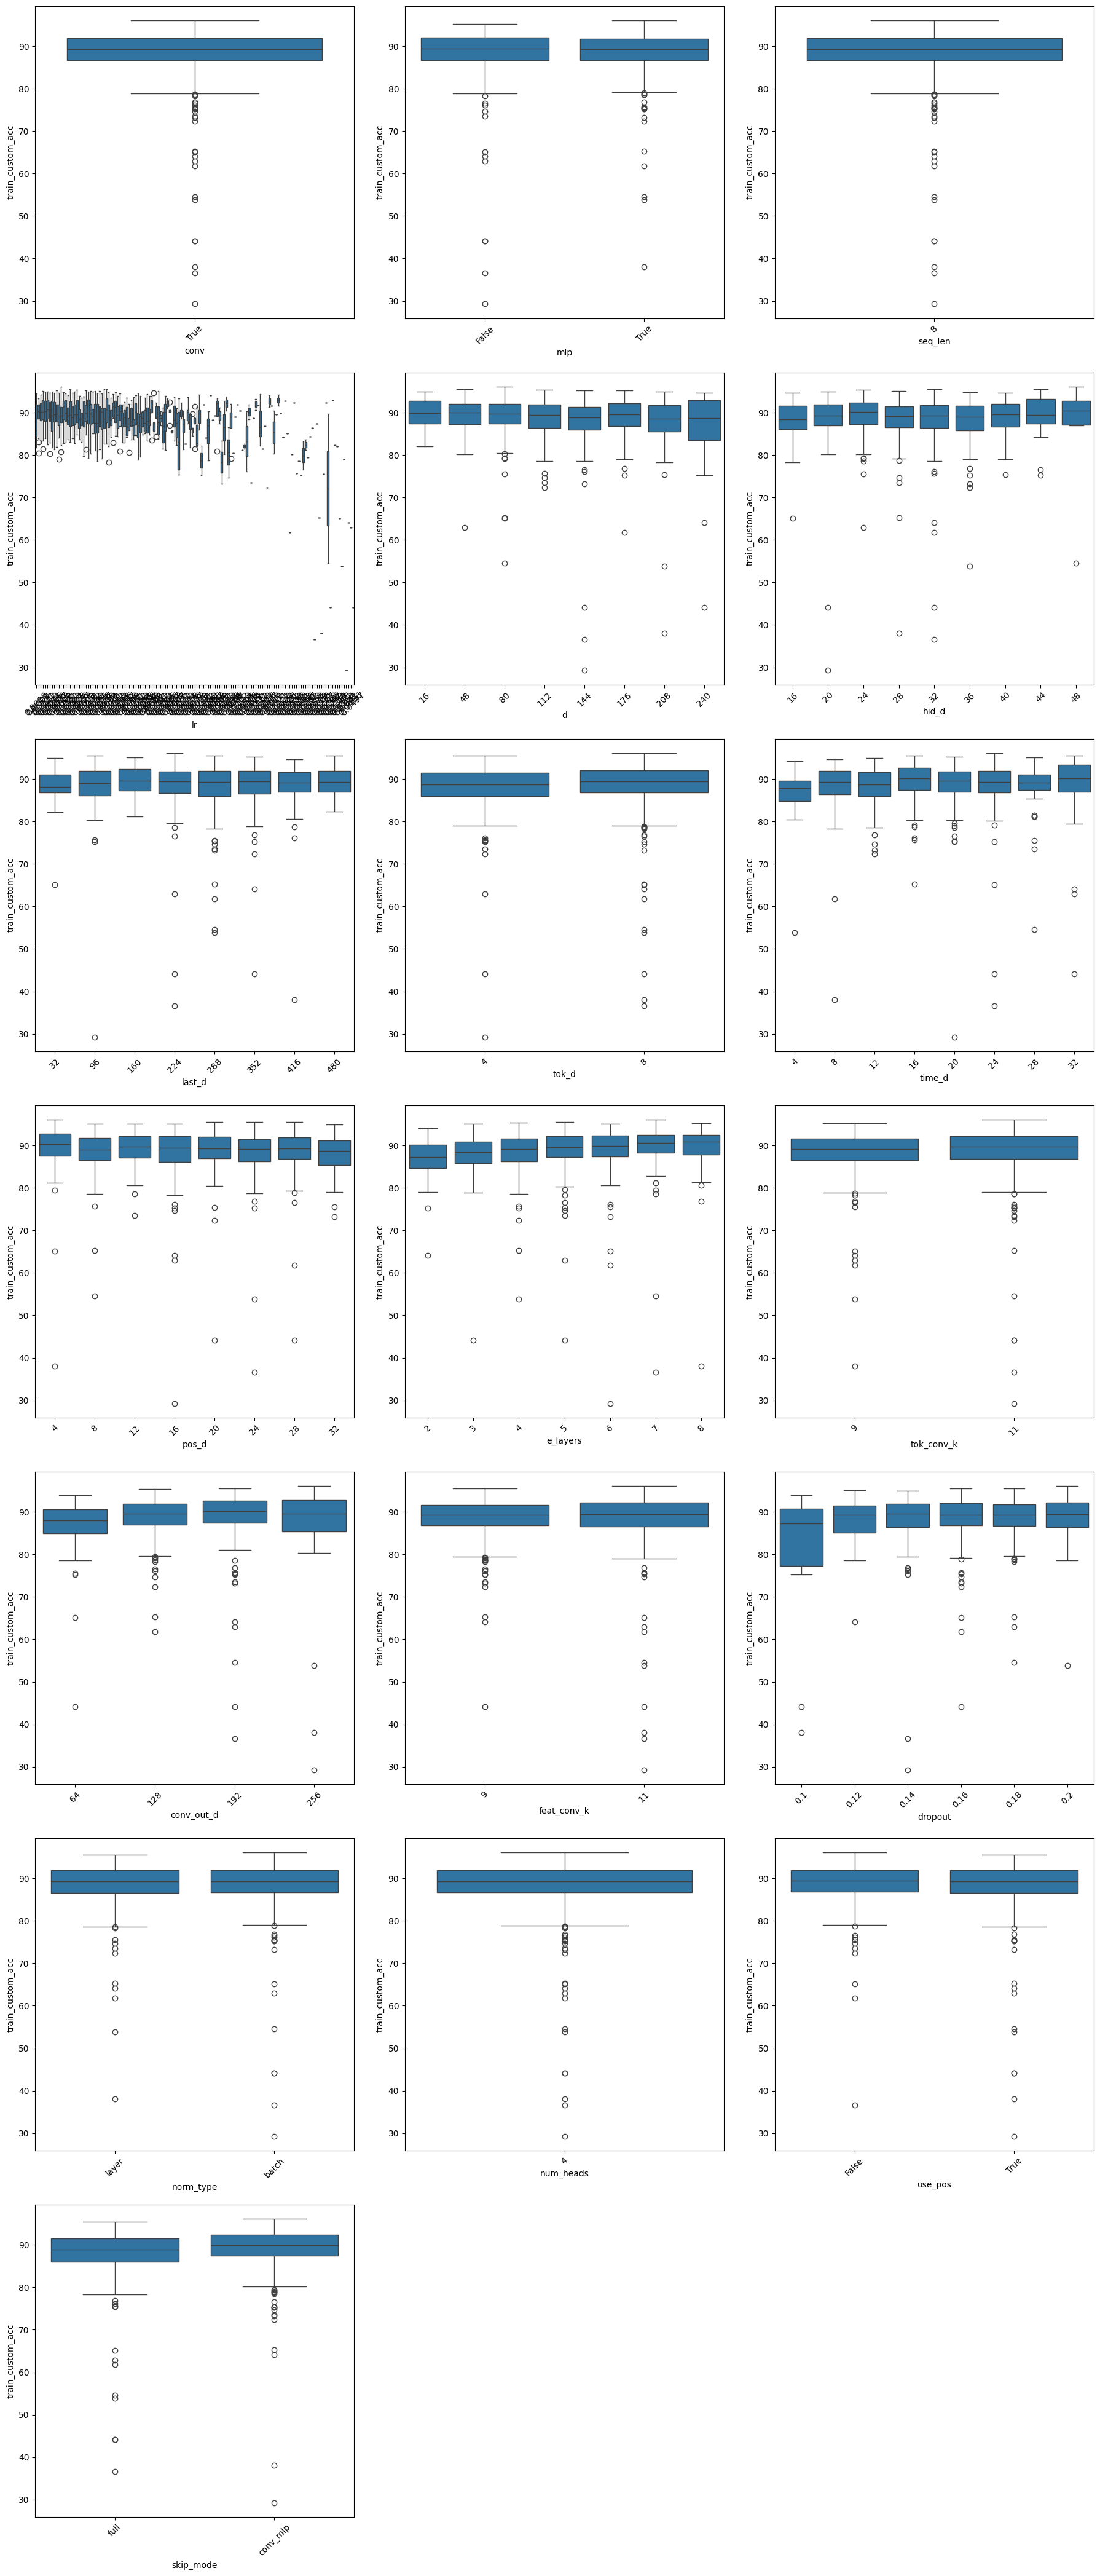

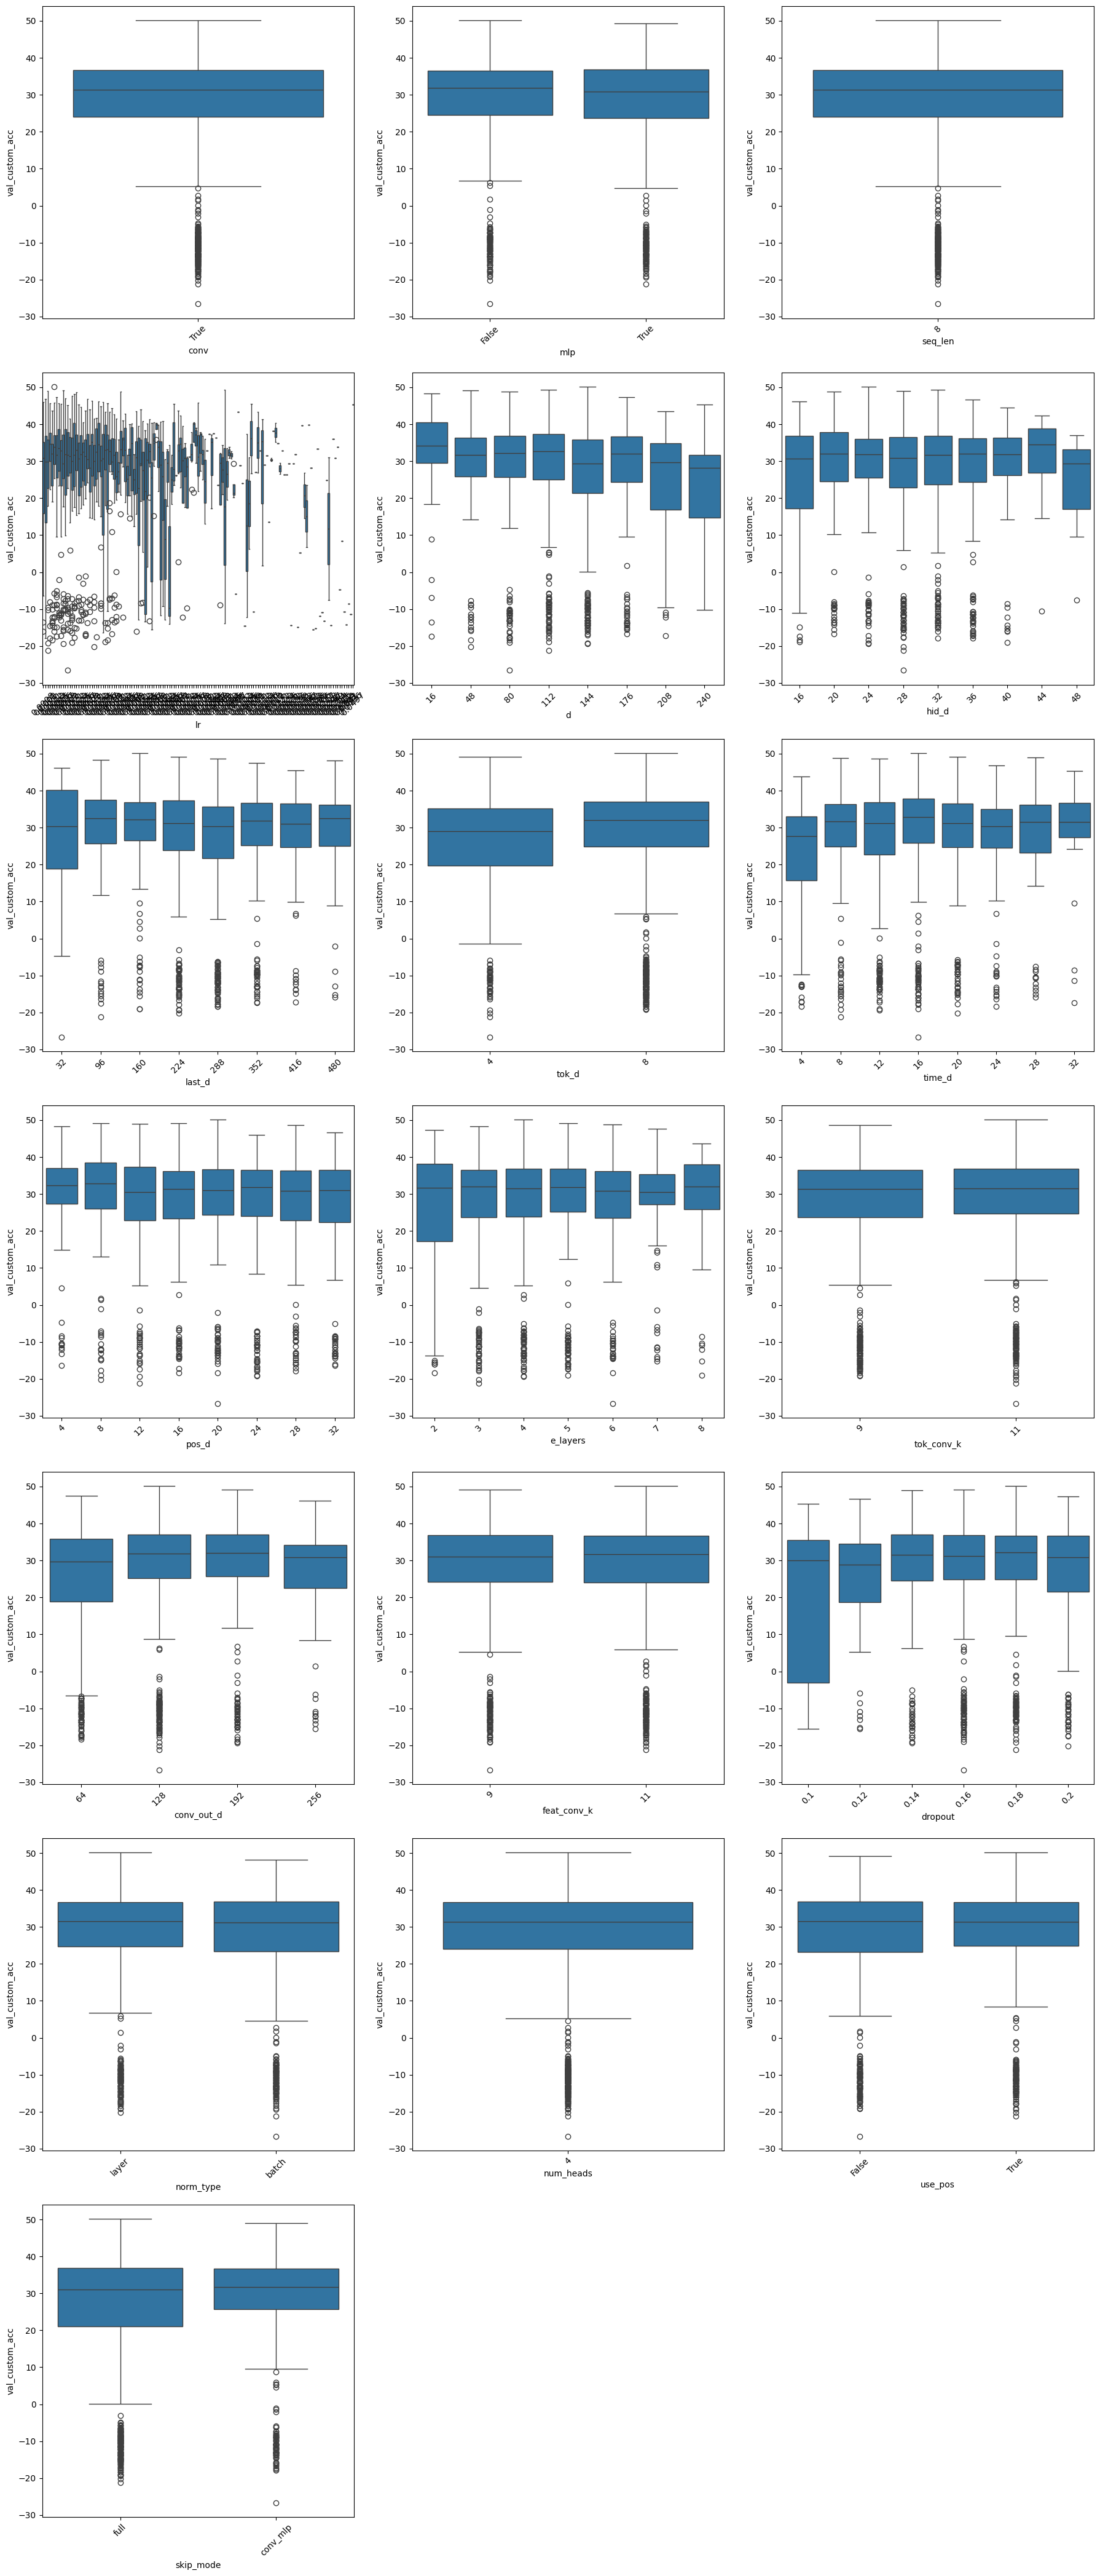

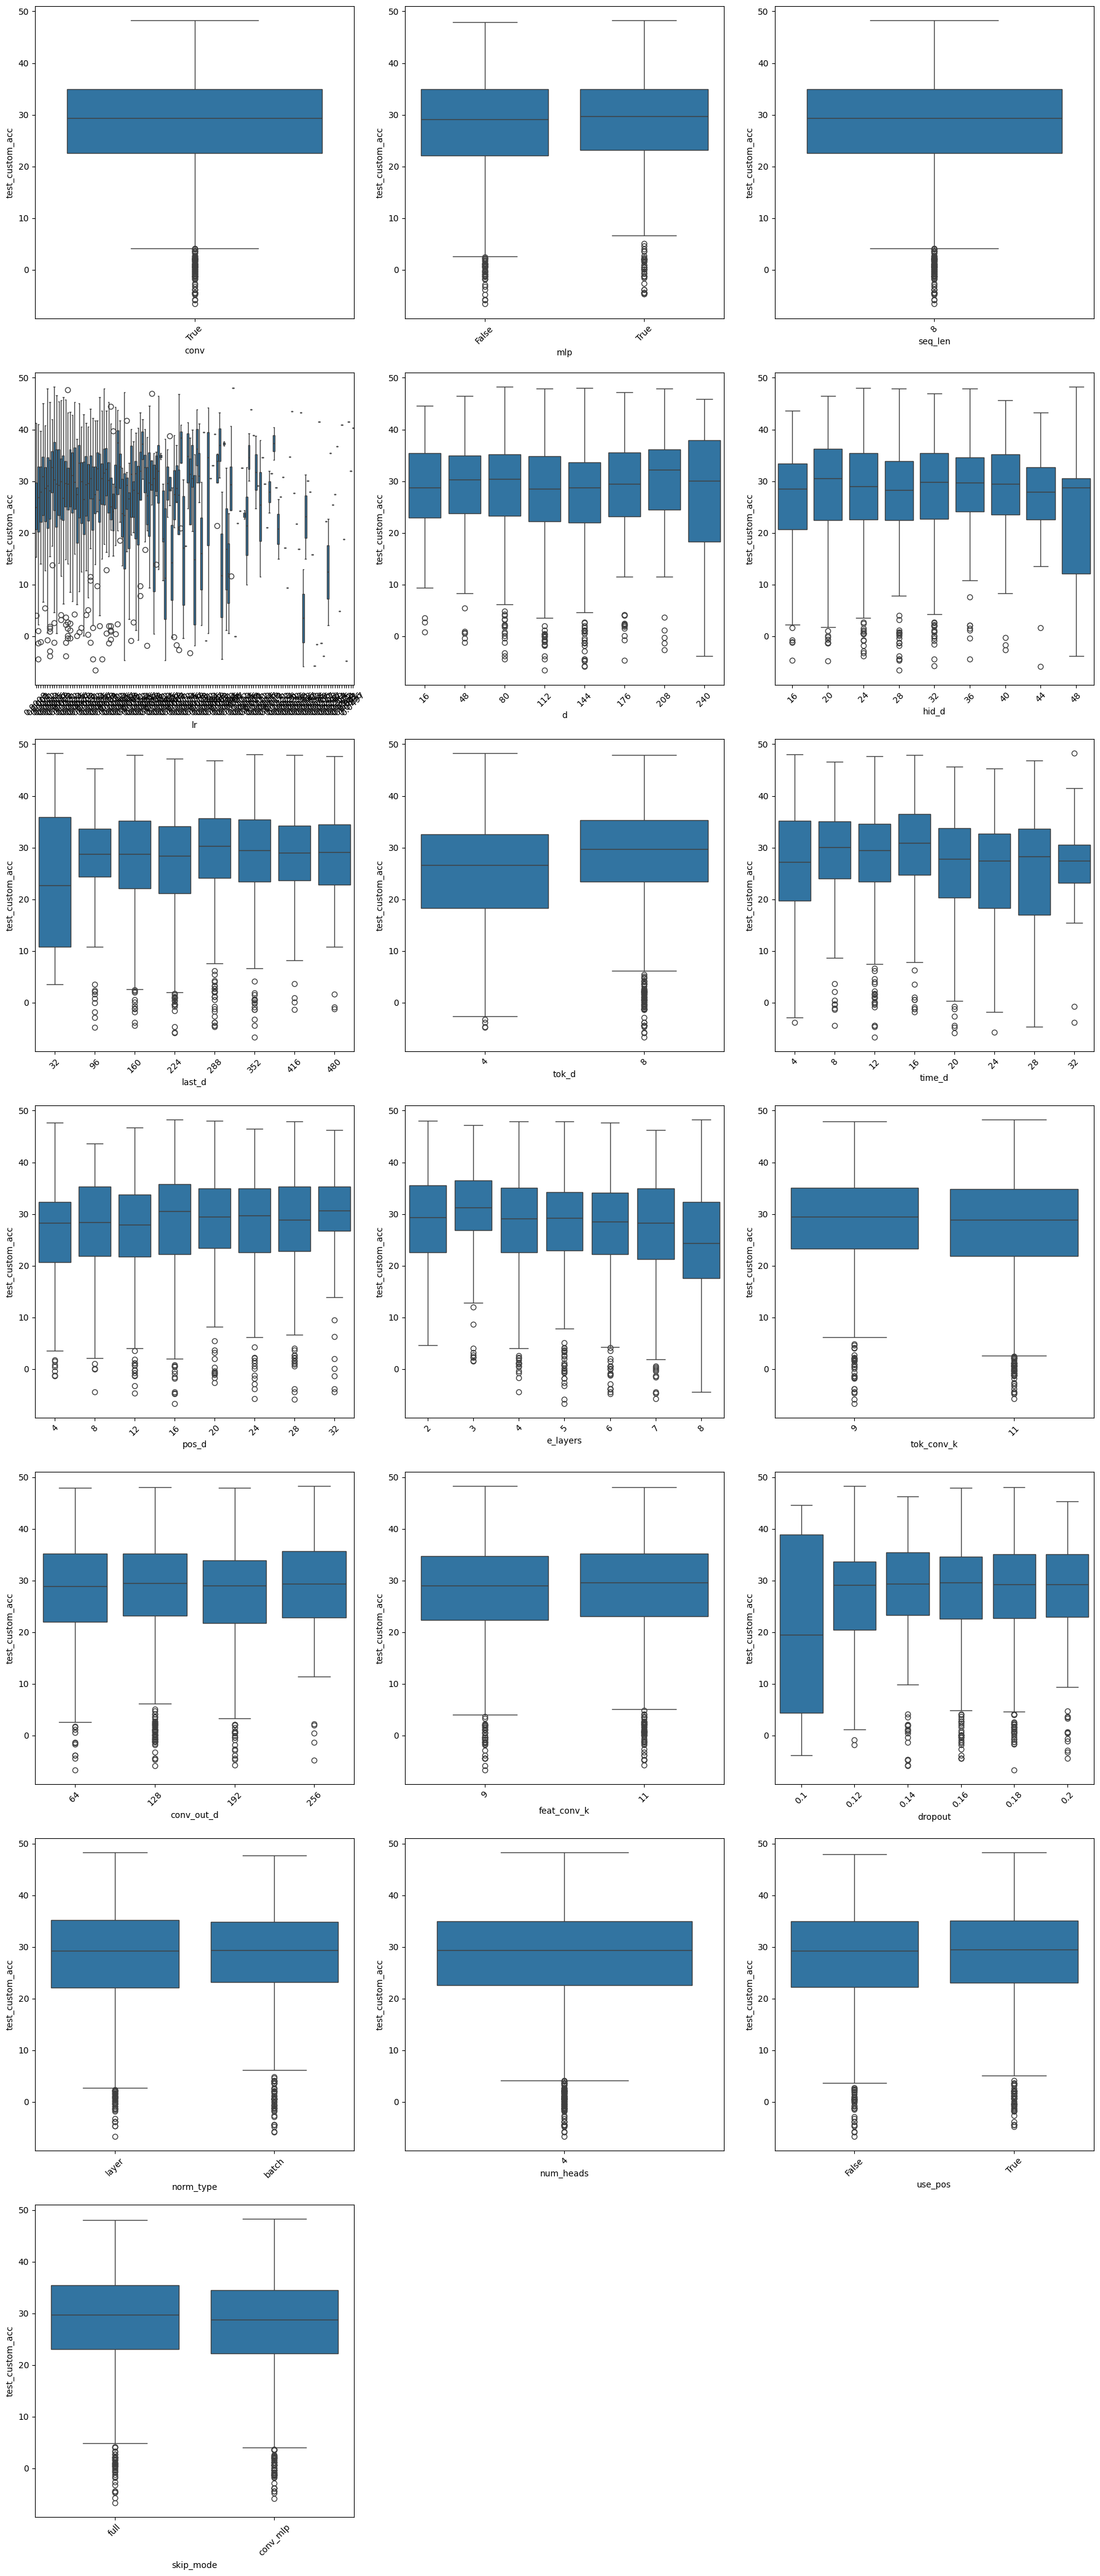

In [5]:
plot_features = [
    "conv",
    "mlp",
    "seq_len",
    "lr",
    "d",  # d_model
    "hid_d",  # hidden_d_model
    "last_d",  # last_d_model
    "tok_d",  # token_d_model
    "time_d",  # time_d_model
    "pos_d",  # pos_d_model
    "e_layers",
    "tok_conv_k",  # token_conv_kernel
    "conv_out_d",  # conv_out_dim
    "feat_conv_k",  # feat_conv_kernel
    "dropout",
    "norm_type",
    "num_heads",
    "use_pos",
    "skip_mode",
]

# Check which features are in the DataFrame
available_features = [feature for feature in plot_features if feature in df.columns]

# Print the available features
print("Available features to plot:", available_features)

# Now, you can plot the effects using the available features
plot_rmse_effects(df, x=available_features)

In [6]:
# Calculate the sum of rmse values for each row

df["sum_rmse"] = 0 * df["train_rmse"] + 0.4 * df["val_rmse"] + 0.4 * df["test_rmse"]

# Sort the rows based on the sum of rmse values
sorted_df = df.sort_values(by="sum_rmse", ascending=True)


In [7]:
sorted_df.columns

Index(['exp_date', 'train_rmse', 'train_custom_acc', 'val_rmse_for_best_train',
       'val_custom_acc_for_best_train', 'test_rmse_for_best_train',
       'test_custom_acc_for_best_train', 'train_epoch_for_best_train',
       'val_rmse', 'val_custom_acc', 'train_rmse_for_best_val',
       'train_custom_acc_for_best_val', 'test_rmse_for_best_val',
       'test_custom_acc_for_best_val', 'val_epoch_for_best_val', 'test_rmse',
       'test_custom_acc', 'train_rmse_for_best_test',
       'train_custom_acc_for_best_test', 'val_rmse_for_best_test',
       'val_custom_acc_for_best_test', 'test_epoch_for_best_test', 'scale_y',
       'skip_mode', 'conv', 'mlp', 'use_pos', 'seq_len', 'lr', 'd', 'hid_d',
       'last_d', 'tok_d', 'time_d', 'pos_d', 'e_layers', 'tok_conv_k',
       'conv_out_d', 'feat_conv_k', 'dropout', 'norm_type', 'num_heads', 'bs',
       'sum_rmse'],
      dtype='object')

In [8]:
selected_cols = [
    "train_rmse",
    "train_custom_acc",
    "val_rmse",
    "val_custom_acc",
    "test_rmse_for_best_val",
    "test_rmse",
    "test_custom_acc",
    "val_custom_acc_for_best_test",
]
sorted_df[selected_cols].head(10)

,train_rmse,train_custom_acc,val_rmse,val_custom_acc,test_rmse_for_best_val,test_rmse,test_custom_acc,val_custom_acc_for_best_test
440,11207.0850,88.127121,65182.887,39.819366,68631.970,68631.970,36.534084,39.819366
571,10794.7770,88.410690,68171.830,34.363960,75228.280,65780.500,34.778931,34.223907
269,15509.9430,82.343666,68477.370,30.855686,68071.270,66505.120,27.507549,30.338455
5,14117.7650,86.373047,63645.703,45.587559,71501.340,71501.340,38.843292,45.587559
139,8544.8940,91.143372,65211.430,27.706169,70106.230,70106.230,18.705118,27.706169
338,11153.1455,89.517311,67678.130,28.613258,70219.695,67679.550,27.097548,29.804594
1009,8461.5220,90.783203,65738.340,33.665623,72899.000,69719.760,35.949398,32.264282
1011,7919.2505,91.930168,67811.670,32.819874,73651.610,67732.550,40.839706,37.759853
1208,10365.4560,89.206871,65788.410,40.092880,76853.880,69886.150,31.767654,39.032536
589,8838.2295,89.659538,63811.887,34.883533,78869.000,72164.164,28.788906,42.228706


In [9]:
# Print the top rows with the minimal sum of rmse
top_n = 10  # Number of top rows to print


# Drop the specified columns
columns_to_drop = [
    # "train_custom_acc_for_best_val",
    # "train_custom_acc",
    # "val_custom_acc",
    # "test_custom_acc",
    # "train_custom_acc_for_best_test",
    # "val_custom_acc_for_best_train",
    # "val_custom_acc_for_best_test",
    # "test_custom_acc_for_best_train",
    # "test_custom_acc_for_best_val",
]

output = sorted_df.head(top_n).drop(columns=columns_to_drop)


In [10]:
# print last few columns
print(output.iloc[:, -16:])

          lr    d  hid_d  last_d  tok_d  time_d  pos_d  e_layers  tok_conv_k  \
440   0.0019  112     20      32      8      12      4         4          11   
571   0.0027   48     36     416      8       8     16         3           9   
269   0.0254   16     36     480      8       8     16         3          11   
5     0.0037  144     28     224      8       8     24         5          11   
139   0.0023  144     28     352      8      16     20         5           9   
338   0.0013  112     32     416      8       8     28         3           9   
1009  0.0022  144     24     288      8      16     32         4           9   
1011  0.0038  112     36     352      8      12     20         3           9   
1208  0.0016   80     44     224      8      16     24         2          11   
589   0.0121   16     28     224      8       8     12         6           9   

      conv_out_d  feat_conv_k  dropout norm_type  num_heads    bs    sum_rmse  
440          128           11     0.20 